# Hypervector Capacity

These are experiments exploring the capabilities of hypervectors. 



## Storing values in hypervectors

Many machine learning algorithms require statistical analysis of input streams, but tokens...

Here, comparing values stored in hypervectors to true values. 

In [1]:
import random_idx
import utils
import pickle
import time

from pylab import *
%matplotlib inline

height has been deprecated.

2016-03-30 16:54


In [2]:
alice_text_name="preprocessed_texts/AliceInWonderland.txt"
alice_text = utils.load_text(alice_text_name)

N = 10000
letter_vectors = 2 * (np.random.randn(len(random_idx.alphabet), N) > 0) - 1

### Storing information about letter statistics in hypervectors



In [3]:
alice_vector1 = np.zeros(N)
for l in alice_text:
    alice_vector1 += letter_vectors[random_idx.alphabet.find(l), :]
alice_vector1 = alice_vector1 / len(alice_text)
hyp_prob1 = np.dot(letter_vectors, alice_vector1.T) / N

In [4]:
letter_counts = np.zeros(len(random_idx.alphabet))

for i,letter in enumerate(random_idx.alphabet):
    letter_counts[i] = alice_text.count(letter)

letter_prob = letter_counts / sum(letter_counts)

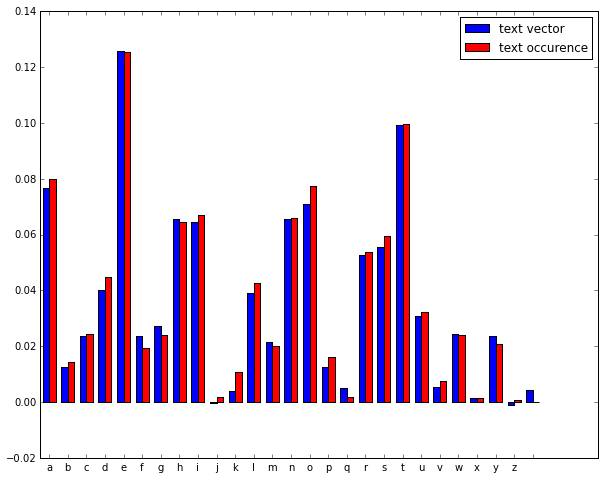

In [5]:
figure(figsize=(10,8))

bar(arange(len(hyp_prob1))+0.15, hyp_prob1, width=0.35, color='b', label='text vector')
bar(arange(len(letter_prob))+0.5, letter_prob, width=0.35, color='r', label='text occurence')

ax = gca()

ax.set_xticks(arange(len(hyp_prob1))+0.5)
th = ax.set_xticklabels(list(random_idx.alphabet))

legend()

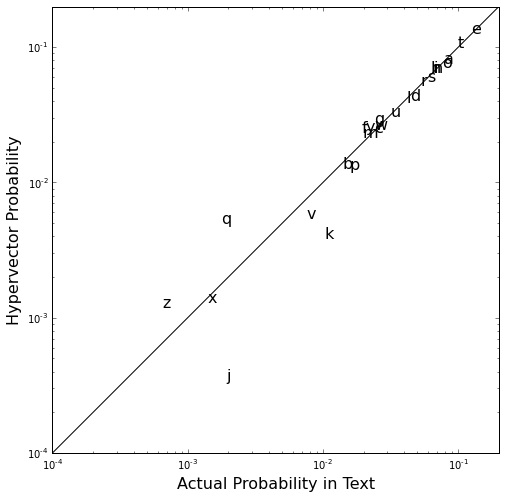

In [8]:
figure(figsize=(8,8))
cla()
plot([0, 0.2], [0, 0.2], 'k')

for i,l in enumerate(random_idx.alphabet):
    if letter_prob[i] < 1e-7:
        continue
        
    text(letter_prob[i], abs(hyp_prob1[i]), l, fontsize=16) # abs to deal with potential negatives
ax = gca()
ax.set_xlim([1e-4, 0.2])
ax.set_xscale('log')
ax.set_ylim([1e-4, 0.2])
ax.set_yscale('log')

xlabel('Actual Probability in Text', fontsize=16)
ylabel('Hypervector Probability', fontsize=16)


In [373]:
N=10000
alice_vector_log = np.zeros(N)
for l in alice_text:
    letter_val = np.dot(letter_vectors[random_idx.alphabet.find(l),:], alice_vector_log.T)
    if letter_val < 0.5:
        alice_vector_log += letter_vectors[random_idx.alphabet.find(l),:]
    else:
        alice_vector_log += 1/letter_val * letter_vectors[random_idx.alphabet.find(l),:]
    
#alice_vector_log = alice_vector_log / len(alice_text)
hyp_prob_log = np.dot(letter_vectors, alice_vector1.T) / N

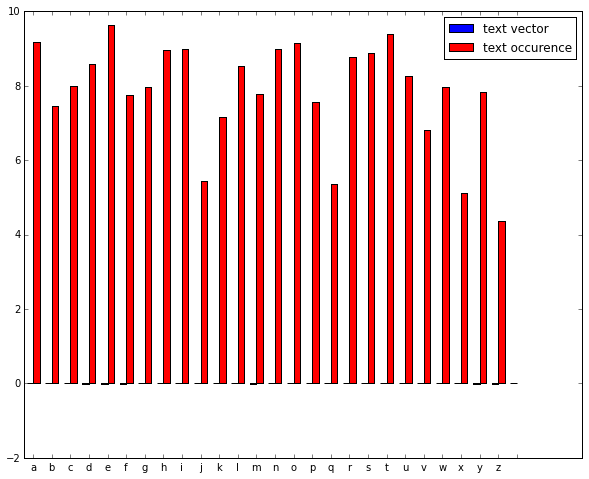

In [376]:
figure(figsize=(10,8))

bar(arange(len(hyp_prob_log))+0.15, hyp_prob_log, width=0.35, color='b', label='text vector')
bar(arange(len(letter_prob))+0.5, log(len(alice_text) * letter_prob), width=0.35, color='r', label='text occurence')

ax = gca()

ax.set_xticks(arange(len(hyp_prob1))+0.5)
th = ax.set_xticklabels(list(random_idx.alphabet))

legend()

### Storing bigrams in hypervectors

In [16]:
ngram = 2
ngram_vector = np.ones(N)
alice_vector2 = np.zeros(N)

for i in range(ngram-1):
    lidx = random_idx.alphabet.find(alice_text[i])
    ngram_vector = np.roll(ngram_vector, 1) * letter_vectors[lidx, :]

for i,l in enumerate(alice_text[(ngram-1):]):
    lidx = random_idx.alphabet.find(l)

    ngram_vector = np.roll(ngram_vector, 1) * letter_vectors[lidx, :]
    
    alice_vector2 += ngram_vector
    
    # remove the first letter of the ngram
    fidx = random_idx.alphabet.find(alice_text[i])

    ngram_vector = ngram_vector * np.roll(letter_vectors[fidx, :], (ngram-1))
    
    
alice_vector2 = alice_vector2 / len(alice_text)


In [17]:
len(alice_text)

120438

In [18]:
#alice_vector2 = random_idx.generate_text_vector(N, letter_vectors, 2, alice_text)

The bigram hypervector does not contain any information about the unigram statistics (because we did not store this information). 


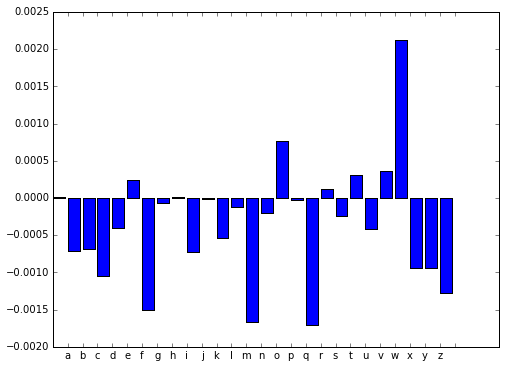

In [19]:
hyp_prob2 = np.dot(letter_vectors, alice_vector2.T) / N
figure(figsize=(8,6));

bar(arange(len(hyp_prob2)), hyp_prob2)

ax = gca()

ax.set_xticks(arange(len(random_idx.alphabet))+1)
th = ax.set_xticklabels(list(random_idx.alphabet))


In [20]:
letter_vals2 = np.zeros(len(random_idx.alphabet)**2)
letter_counts2 = np.zeros(len(random_idx.alphabet)**2)
letter_pairs = []
c = 0

for i, letter1 in enumerate(random_idx.alphabet):
    for j, letter2 in enumerate(random_idx.alphabet):
        
        letter_pairs.append(letter1+letter2)
        
        letter_counts2[c] = alice_text.count(letter_pairs[c])
        
        vector = np.roll(letter_vectors[i,:], 1) * letter_vectors[j,:]
        
        letter_vals2[c] = np.dot(vector, alice_vector2.T) / N
        c+=1

#%%
letter_prob2 = letter_counts2 / sum(letter_counts2)


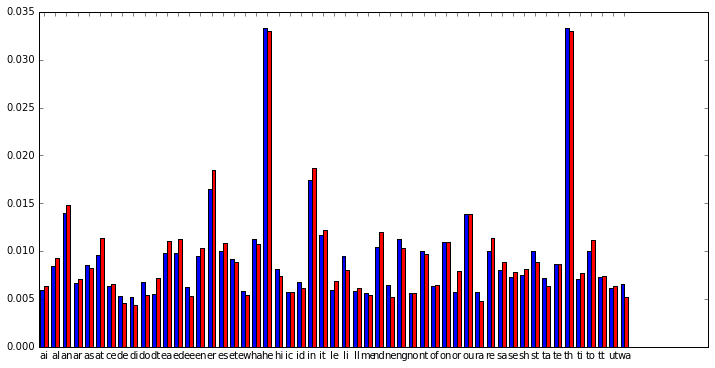

In [21]:
figure(figsize=(12,6))

sig_idx = find(letter_vals2 > 0.005)

b1=bar(arange(len(letter_vals2[sig_idx]))+0.15, letter_vals2[sig_idx], width=0.35, color='b')
b2=bar(arange(len(letter_prob2[sig_idx]))+0.5, letter_prob2[sig_idx], width=0.35, color='r')

ax = gca()

ax.set_xticks(arange(len(letter_vals2[sig_idx]))+0.5)

pair_labels = []
for i in sig_idx:
    pair_labels.append(letter_pairs[i])
    
t1 = ax.set_xticklabels(pair_labels)

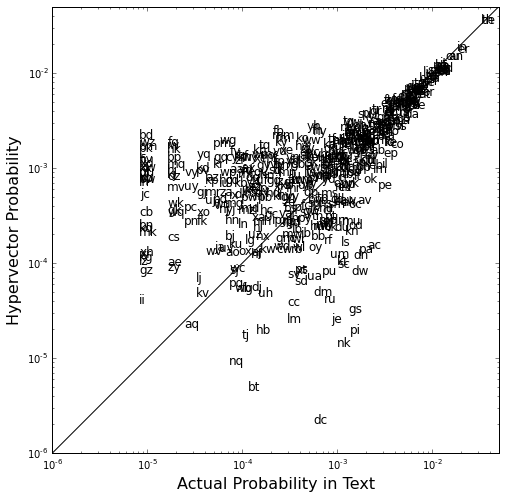

In [22]:
figure(figsize=(8,8))
cla()
plot([1e-7, 0.2], [1e-7, 0.2], 'k')

for i,ll in enumerate(letter_pairs):
    if letter_prob2[i] < 1e-7:
        continue
        
    text(letter_prob2[i], abs(letter_vals2[i]), ll, fontsize=12) # abs to deal with potential negatives
    
ax = gca()
ax.set_xlim([1e-6, 0.05])
ax.set_xscale('log')
ax.set_ylim([1e-6, 0.05])
ax.set_yscale('log')

xlabel('Actual Probability in Text', fontsize=16)
ylabel('Hypervector Probability', fontsize=16)


## Storing arbitrary sequences of fixed number of tokens

Lets do an experiment and see how many letters we really can store in the hypervector. It will be important to test different dimensionality of the hypervectors and compare how the capacity scales with the dimensionality. But there are also other things to consider:

- the dimensionality of the input
- the sparsity of the input
- input statistics -- structured sentences vs random letters?
- permutation vs random orthogonal vs random

The basic strategy of testing the hypervector I'm considering is to have three read-out units: one that is reads out the last input, another that reads out a fixed input away, and another that reads out the first input always. Then we will just add one letter at a time to the hypervector, and read it out as long as possible.


In [23]:
def test_capacity_independent_roll(N, K=5, trials=5e3):
    letter_vectors = 2 * (np.random.randn(len(random_idx.alphabet), N) > 0) - 1

    hypercapacity = np.zeros(N)

    tstart = time.time()
    lidx = np.zeros(trials)
    lidx[0] = np.random.randint(len(random_idx.alphabet))
    hypercapacity = letter_vectors[lidx[0], :]

    lidx_last_input = np.zeros(trials)
    lidx_input_K = np.zeros(trials)
    lidx_first_input = np.zeros(trials)

    for i in range(int(trials)-1):
        
        lidx[i+1] = np.random.randint(len(random_idx.alphabet))

        hypercapacity = np.roll(hypercapacity, 1) + letter_vectors[lidx[i+1], :]

        v_last_input = np.roll(hypercapacity, -1)
        v_input_K = np.roll(hypercapacity, -K) # we can still do this less than K, it will just be noise
        v_first_input = np.roll(hypercapacity, -(i+1))
        
        lidx_last_input[i] = argmax(np.dot(letter_vectors, v_last_input.T))
        lidx_input_K[i] = argmax(np.dot(letter_vectors, v_input_K.T))
        lidx_first_input[i] = argmax(np.dot(letter_vectors, v_first_input.T))

        lli = random_idx.alphabet[int(lidx_last_input[i])]
        liK = random_idx.alphabet[int(lidx_input_K[i])]
        lfi = random_idx.alphabet[int(lidx_first_input[i])]

        #print '%03d:' % i, l, lli, liK, lfi

    print 'Duration: ', time.time() - tstart
    
    return lidx, lidx_last_input, lidx_input_K, lidx_first_input

In [24]:
test_N = [100, 500, 1000, 5000, 10000]
#test_N = [100, 300, 900, 2700, 8100, 24300]
runs = 5

run_id = []
run_N = []
lidx_all = []
lidx_li_all = []
lidx_iK_all = []
lidx_fi_all = []

for r in range(runs):
    print r
    for N in test_N:
        lidx, lidx_li, lidx_iK, lidx_fi = test_capacity_independent_roll(N)
        
        run_id.append(r)
        run_N.append(N)
        lidx_all.append(lidx)
        lidx_li_all.append(lidx_li)
        lidx_iK_all.append(lidx_iK)
        lidx_fi_all.append(lidx_fi)
        
filename = 'data/hypervector_capacity-independent_roll-N=' + str(len(test_N)) + '-r=' + str(runs) + '-n' + time.strftime('%y%m%d') + '.npz'
print filename
np.savez(filename, lidx_all=lidx_all, lidx_li_all=lidx_li_all, lidx_iK_all=lidx_iK_all, lidx_fi_all=lidx_fi_all)


0
Duration:  0.221248149872
Duration:  0.361820936203
Duration:  0.546076059341
Duration:  1.88776803017
Duration:  3.61460494995
1
Duration:  0.17019200325
Duration:  0.355141878128
Duration:  0.522819042206
Duration:  1.90525913239
Duration:  3.63333392143
2
Duration:  0.178497076035
Duration:  0.350852966309
Duration:  0.531615018845
Duration:  1.94212198257
Duration:  3.62610292435
3
Duration:  0.175842046738
Duration:  0.329255819321
Duration:  0.534288167953
Duration:  1.90511989594
Duration:  3.58939409256
4
Duration:  0.169438123703
Duration:  0.349025964737
Duration:  0.533331155777
Duration:  1.94092202187
Duration:  3.67656898499
data/hypervector_capacity-independent_roll-N=5-r=5-n160330.npz


/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: Depre

In [25]:
h = np.load('data/hypervector_capacity-independent_roll-N=5-r=5-n160330.npz')
lidx_all = h['lidx_all']
lidx_li_all = h['lidx_li_all']
lidx_iK_all = h['lidx_iK_all']
lidx_fi_all = h['lidx_fi_all']

In [26]:
run_id = np.array(run_id)
run_N = np.array(run_N)

uN = unique(run_N)
uN = np.array([100, 500, 1000, 5000, 10000])
K=5

li_mean = np.zeros((lidx_li_all[0].shape[0], len(uN)))
iK_mean = np.zeros((lidx_iK_all[0].shape[0], len(uN)))
fi_mean = np.zeros((lidx_fi_all[0].shape[0], len(uN)))

for iN, idxN in enumerate(uN):
    idxs = find(run_N==idxN)
    for i in idxs:
        li_mean[:,iN] += np.array(lidx_all[i] == lidx_li_all[i], 'int32')
        iK_mean[:,iN] += np.array(lidx_all[i] == roll(lidx_iK_all[i], -K+1), 'int32')                             
        fi_mean[:,iN] += np.array(lidx_all[i][0] == lidx_fi_all[i], 'int32')
    
li_mean = li_mean / runs
iK_mean = iK_mean / runs
fi_mean = fi_mean / runs


(0, 900)

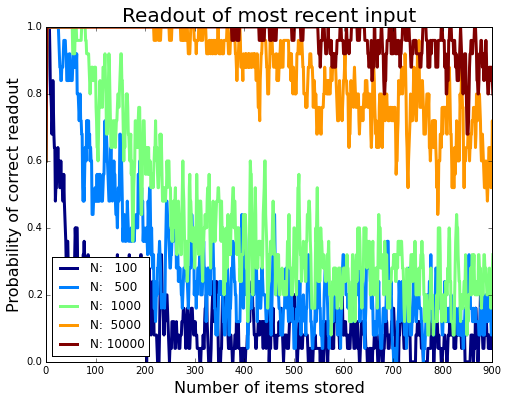

In [27]:
figure(figsize=(8,6))
cm=get_cmap('jet', li_mean.shape[1])

for i in range(li_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(li_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="N: %5i" % test_N[i])
    
legend(loc='lower left');
title('Readout of most recent input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)
xlim([0, 900])

### Recurrent Neural Networks and Hypervectors

This is a set of experiments testing the capacity of hypervectors with extrapolation to recurrent neural networks. 

This is to answer some of these questions:
1. What is the relationship with capacity and dimensionality of the hypervector?
2. What is the relationship with capacity and dimensionality of the input?
3. Is there any relationship with capacity and input statistics? i.e. natural language vs. random letters
4. What is the difference between permutation, random orthogonal, and random normal weight matrices?


In [ ]:
def random_orthogonal(n):
    a = np.random.random((n,n))
    q, r = np.linalg.qr(a)
    
    return q


In [ ]:
def test_capacity_natural_ro(N, ro, K=5):
    letter_vectors = 2 * (np.random.randn(len(random_idx.alphabet), N) > 0) - 1

    letter_sequence='''this hypervector is going to contain a lot of letters at some point it will run out of capacity and it should 
    no longer be capable of storing patterns indefinitely the dimensionality of the hypervectors will play an important role in its 
    capacity understanding the relationship between dimensionality and capacity is extremely important and wow you can totally put a
    lot more letters in the hypervector than i expected with one thousand dimensions you can easily store one hundred letters in the 
    hypervector with no loss and using a totally random orthogonal matrix this is pretty crazy it seems to be quite noisy for a while 
    but it still retains some information capacity i had to go back and add these letters to push it further and get to the point where 
    it was clearly going haywire the other thing is that the values of the hypervector are also continually increasing'''

    hypercapacity = np.zeros(N)

    # we have ro, but lets also store read out matrices
    last_input = np.linalg.matrix_power(ro, -1)
    input_K = np.linalg.matrix_power(ro, -K)
    first_input = np.linalg.matrix_power(ro, -1) # this one we will build up continuously

    tstart = time.time()
    lidx = np.zeros(len(letter_sequence))
    lidx[0] = random_idx.alphabet.find(letter_sequence[0])
    hypercapacity = np.dot(ro, hypercapacity) + letter_vectors[lidx[0], :]

    lidx_last_input = np.zeros(len(letter_sequence))
    lidx_input_K = np.zeros(len(letter_sequence))
    lidx_first_input = np.zeros(len(letter_sequence))

    for i,l in enumerate(letter_sequence[1:]):
        lidx[i+1] = random_idx.alphabet.find(l)

        hypercapacity = np.dot(ro, hypercapacity) + letter_vectors[lidx[i+1], :]

        v_last_input = np.dot(last_input, hypercapacity)
        v_input_K = np.dot(input_K, hypercapacity) # we can still do this less than K, it will just be noise
        v_first_input = np.dot(first_input, hypercapacity)
        first_input = np.dot(last_input, first_input) # we have to continually update this readout matrix

        lidx_last_input[i] = argmax(np.dot(letter_vectors, v_last_input.T))
        lidx_input_K[i] = argmax(np.dot(letter_vectors, v_input_K.T))
        lidx_first_input[i] = argmax(np.dot(letter_vectors, v_first_input.T))

        lli = random_idx.alphabet[int(lidx_last_input[i])]
        liK = random_idx.alphabet[int(lidx_input_K[i])]
        lfi = random_idx.alphabet[int(lidx_first_input[i])]

        #print '%03d:' % i, l, lli, liK, lfi

    print 'Duration: ', time.time() - tstart
    
    return lidx, lidx_last_input, lidx_input_K, lidx_first_input

In [ ]:
#test_N = [100, 200, 500]
test_N = [100, 500, 1000, 5000, 10000]
runs = 5

run_id = []
run_N = []
lidx_all = []
lidx_li_all = []
lidx_iK_all = []
lidx_fi_all = []

for r in range(runs):
    print r
    for N in test_N:
        lidx, lidx_li, lidx_iK, lidx_fi = test_capacity_natural_ro(N, random_orthogonal(N))
        
        run_id.append(r)
        run_N.append(N)
        lidx_all.append(lidx)
        lidx_li_all.append(lidx_li)
        lidx_iK_all.append(lidx_iK)
        lidx_fi_all.append(lidx_fi)
        
filename = 'data/hypervector_capacity-natural_ro-N=' + str(len(test_N)) + '-r=' + str(runs) + '-n' + time.strftime('%y%m%d') + '.npz'
print filename
np.savez(filename, lidx_all=lidx_all, lidx_li_all=lidx_li_all, lidx_iK_all=lidx_iK_all, lidx_fi_all=lidx_fi_all)


In [28]:
h = np.load('data/hypervector_capacity-natural_ro-N=5-r=5-n160315.npz')
lidx_all = h['lidx_all']
lidx_li_all = h['lidx_li_all']
lidx_iK_all = h['lidx_iK_all']
lidx_fi_all = h['lidx_fi_all']

In [29]:
run_id = np.array(run_id)
run_N = np.array(run_N)

uN = unique(run_N)
K=5

li_mean = np.zeros((lidx_li_all[0].shape[0], len(uN)))
iK_mean = np.zeros((lidx_iK_all[0].shape[0], len(uN)))
fi_mean = np.zeros((lidx_fi_all[0].shape[0], len(uN)))

for iN, idxN in enumerate(uN):
    idxs = find(run_N==idxN)
    for i in idxs:
        li_mean[:,iN] += np.array(lidx_all[i] == lidx_li_all[i], 'int32')
        iK_mean[:,iN] += np.array(lidx_all[i] == roll(lidx_iK_all[i], -K+1), 'int32')                             
        fi_mean[:,iN] += np.array(lidx_all[i][0] == lidx_fi_all[i], 'int32')
    
li_mean = li_mean / runs
iK_mean = iK_mean / runs
fi_mean = fi_mean / runs


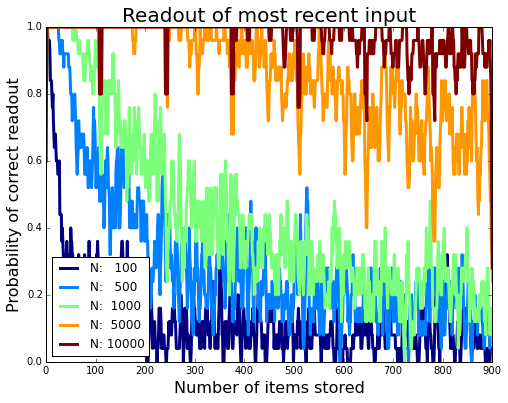

In [30]:
figure(figsize=(8,6))
cm=get_cmap('jet', li_mean.shape[1])

for i in range(li_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(li_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="N: %5i" % test_N[i])
    
legend(loc='lower left');
title('Readout of most recent input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)

**Figure 1: Capacity of hyperrnn.** A string of 900 characters was sequentially stored in a hyper-rnn with random orthogonal weights. The readout of the most recent input falls off at different rates depending on the dimensionality. A 1000-D hyper-rnn can store over 50 memories of 27 characters. 

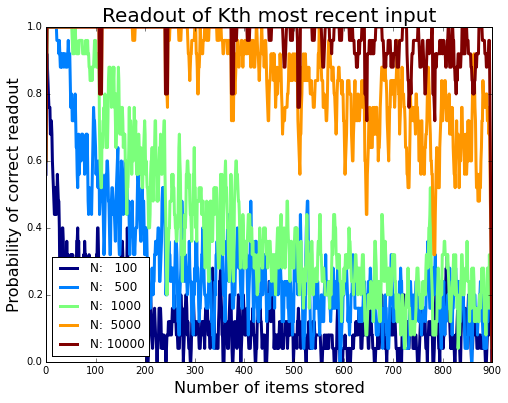

In [31]:
figure(figsize=(8,6))
cm=get_cmap('jet', iK_mean.shape[1])

for i in range(iK_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(iK_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="N: %5i" % test_N[i])
    
legend(loc='lower left')
title('Readout of Kth most recent input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)

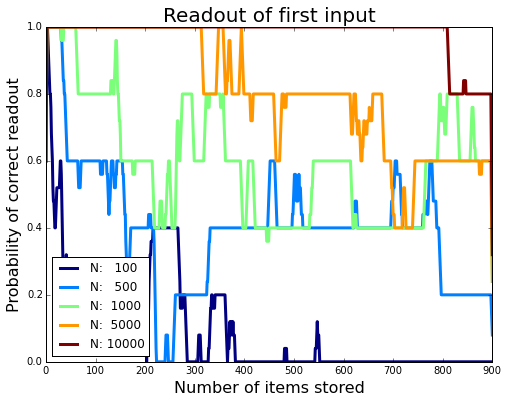

In [32]:
figure(figsize=(8,6))
cm=get_cmap('jet', fi_mean.shape[1])

for i in range(fi_mean.shape[1]):
    smoothN = 5
    plot(np.convolve(fi_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="N: %5i" % test_N[i])
    
legend(loc='lower left')
title('Readout of first input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)

### Capacity and dimensionality of tokens

Another big factor that could effect the capacity of the hypervector is the dimensionality of the tokens. In the above examples, we have been storing the fixed tokens of 'abcd...xyz '. The hypervector or rnn would receive one of these 27 possibilities at each time point. 

We will call this 27 $D$. 

We can change $D$ by adding more letter tokens. e.g. we could include all lower and upper case letters and have 53 tokens, we could include all punctuation and have even more. 

We can also note a potential relationship between sparsity of the input and $D$. Note that the input is always 1-sparse of $D$, so the input structure is 1-sparse and has a dimensionality of $D$.  We could imagine a different kind of input stream into an RNN, where the input is 2-sparse: i.e. you get two letters simultaneously. However, this can be translated into a 1-sparse representation with $D^2$ number of tokens. This could be used to fundamentally connect an input stream's dimensionality with its sparsity.





In [33]:
def test_capacity_D(N, D, K=5, trials=5e3):
    letter_vectors = 2 * (np.random.randn(D, N) > 0) - 1

    hypercapacity = np.zeros(N)

    tstart = time.time()
    lidx = np.zeros(trials)
    lidx[0] = np.random.randint(D)
    hypercapacity = letter_vectors[lidx[0], :]

    lidx_last_input = np.zeros(trials)
    lidx_input_K = np.zeros(trials)
    lidx_first_input = np.zeros(trials)

    for i in range(int(trials)-1):
        
        lidx[i+1] = np.random.randint(D)

        hypercapacity = np.roll(hypercapacity, 1) + letter_vectors[lidx[i+1], :]

        v_last_input = np.roll(hypercapacity, -1)
        v_input_K = np.roll(hypercapacity, -K) # we can still do this less than K, it will just be noise
        v_first_input = np.roll(hypercapacity, -(i+1))
        
        lidx_last_input[i] = argmax(np.dot(letter_vectors, v_last_input.T))
        lidx_input_K[i] = argmax(np.dot(letter_vectors, v_input_K.T))
        lidx_first_input[i] = argmax(np.dot(letter_vectors, v_first_input.T))

    print 'Duration: ', time.time() - tstart
    
    return lidx, lidx_last_input, lidx_input_K, lidx_first_input

In [34]:
test_N = [1000]
test_D = [2, 4, 8, 16, 32, 64, 128]

#test_N = [100, 300, 900, 2700, 8100, 24300]
runs = 5

run_id = []
run_N = []
run_D = []
lidx_all = []
lidx_li_all = []
lidx_iK_all = []
lidx_fi_all = []

for r in range(runs):
    print r
    for N in test_N:
        for D in test_D:
            lidx, lidx_li, lidx_iK, lidx_fi = test_capacity_D(N, D)
        
            run_id.append(r)
            run_N.append(N)
            run_D.append(D)
            lidx_all.append(lidx)
            lidx_li_all.append(lidx_li)
            lidx_iK_all.append(lidx_iK)
            lidx_fi_all.append(lidx_fi)
        
filename = 'data/hypervector_capacity-D-N=' + str(len(test_N)) + '-D=' + str(len(test_D)) + '-r=' + str(runs) + '-n' + time.strftime('%y%m%d') + '.npz'
print filename
np.savez(filename, lidx_all=lidx_all, lidx_li_all=lidx_li_all, lidx_iK_all=lidx_iK_all, lidx_fi_all=lidx_fi_all)


0
Duration:  0.271739959717
Duration:  0.306233167648
Duration:  0.303295135498
Duration:  0.459053993225
Duration:  0.682635068893
Duration:  1.01084089279
Duration:  1.75478506088
1
Duration:  0.210548877716
Duration:  0.250836133957
Duration:  0.359281778336
Duration:  0.377258062363
Duration:  0.560997009277
Duration:  1.02773690224
Duration:  1.79700493813
2
Duration:  0.224581956863
Duration:  0.246165990829
Duration:  0.305330991745
Duration:  0.37717795372
Duration:  0.623373031616
Duration:  0.900015115738
Duration:  1.60214710236
3
Duration:  0.219599962234
Duration:  0.280547857285
Duration:  0.306809902191
Duration:  0.415338993073
Duration:  0.600008010864
Duration:  0.927412033081
Duration:  1.70565700531
4
Duration:  0.285847902298
Duration:  0.253736019135
Duration:  0.304184913635
Duration:  0.403481006622
Duration:  0.560114145279
Duration:  0.906940937042
Duration:  1.60139203072
data/hypervector_capacity-D-N=1-D=7-r=5-n160330.npz


/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: Depre

In [35]:
h = np.load('data/hypervector_capacity-D-N=1-D=7-r=5-n160330.npz')
lidx_all = h['lidx_all']
lidx_li_all = h['lidx_li_all']
lidx_iK_all = h['lidx_iK_all']
lidx_fi_all = h['lidx_fi_all']

In [36]:
run_id = np.array(run_id)
run_D = np.array(run_D)

uD = unique(run_D)

li_mean = np.zeros((lidx_li_all[0].shape[0], len(uD)))
iK_mean = np.zeros((lidx_iK_all[0].shape[0], len(uD)))
fi_mean = np.zeros((lidx_fi_all[0].shape[0], len(uD)))

for iD, idxD in enumerate(uD):
    idxs = find(run_D==idxD)
    for i in idxs:
        li_mean[:,iD] += np.array(lidx_all[i] == lidx_li_all[i], 'int32')
        iK_mean[:,iD] += np.array(lidx_all[i] == roll(lidx_iK_all[i], -K+1), 'int32')                             
        fi_mean[:,iD] += np.array(lidx_all[i][0] == lidx_fi_all[i], 'int32')
    
li_mean = li_mean / runs
iK_mean = iK_mean / runs
fi_mean = fi_mean / runs


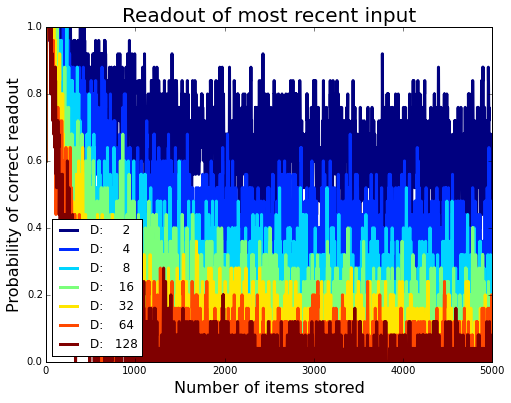

In [37]:
figure(figsize=(8,6))

cm=get_cmap('jet', li_mean.shape[1])

for i in range(li_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(li_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
legend(loc='lower left');
title('Readout of most recent input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)


(0, 300)

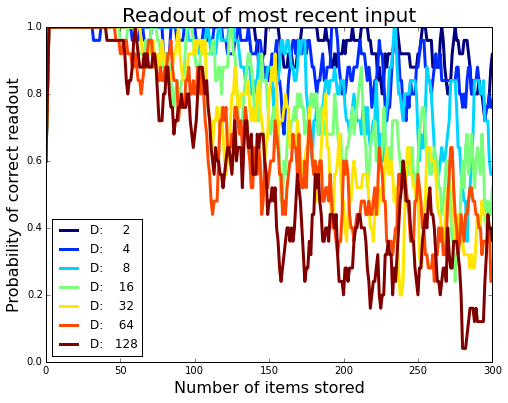

In [38]:
figure(figsize=(8,6))

cm=get_cmap('jet', li_mean.shape[1])

for i in range(li_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(li_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
legend(loc='lower left');
title('Readout of most recent input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)
xlim([0, 300])

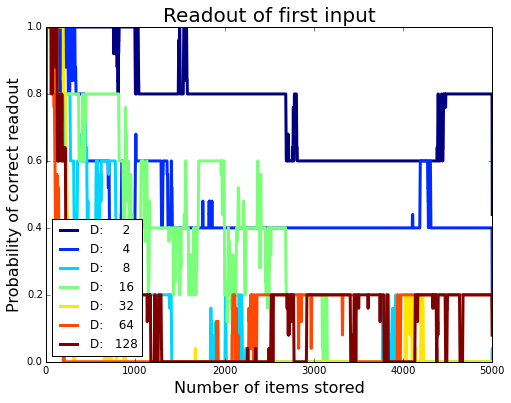

In [39]:
figure(figsize=(8,6))

cm=get_cmap('jet', li_mean.shape[1])

for i in range(fi_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(fi_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
legend(loc='lower left');
title('Readout of first input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)


### Hypervectors with decay

The roll operation or the random orthogonal matrix has an important property defined by the eigenvalues. For roll or random orth matrices the eigenvalues are all 1, which means that the hypervector/rnn will attempt to store all information from all time. We have seen how the chaos will build up until no information can be stored. This means that the most recent input or the first input have the same likelihoods of being correctly read out. 

In the context of RNNs this is harmful. This is because an RNN will fill up at some point, and chaos will dominate its dynamics instead of information. When this happens, even the most recent items added to the RNN will be undecodable. This means that the RNN has filled up, and it is over capacity.

A more useful RNN could have memory only for a finite amount of history. In this case, we could imagine the weight matrix having eigenvalue slightly less than 1, or we decay the hypervector by a small amount each time step. This type of decay will exponentially decrease the information energy in the hypervector, and should enable storage of recent sequences indefinitely, but perhaps at the cost of not being able to store quite as much.


In [40]:
def test_capacity_decay(N, D, decay=1, K=5, trials=5e3):
    letter_vectors = 2 * (np.random.randn(D, N) > 0) - 1

    hypercapacity = np.zeros(N)

    tstart = time.time()
    lidx = np.zeros(trials)
    lidx[0] = np.random.randint(D)
    hypercapacity = letter_vectors[lidx[0], :]

    lidx_last_input = np.zeros(trials)
    lidx_input_K = np.zeros(trials)
    lidx_first_input = np.zeros(trials)

    for i in range(int(trials)-1):
        
        lidx[i+1] = np.random.randint(D)

        hypercapacity = decay * np.roll(hypercapacity, 1) + letter_vectors[lidx[i+1], :]

        v_last_input = np.roll(hypercapacity, -1)
        v_input_K = np.roll(hypercapacity, -K) # we can still do this less than K, it will just be noise
        v_first_input = np.roll(hypercapacity, -(i+1))
        
        lidx_last_input[i] = argmax(np.dot(letter_vectors, v_last_input.T))
        lidx_input_K[i] = argmax(np.dot(letter_vectors, v_input_K.T))
        lidx_first_input[i] = argmax(np.dot(letter_vectors, v_first_input.T))

    print 'Duration: ', time.time() - tstart
    
    return lidx, lidx_last_input, lidx_input_K, lidx_first_input

In [41]:
test_N = [2000]
test_D = [2, 4, 8, 16, 32, 64]

#test_N = [100, 300, 900, 2700, 8100, 24300]
runs = 5

run_id = []
run_N = []
run_D = []
lidx_all = []
lidx_li_all = []
lidx_iK_all = []
lidx_fi_all = []

K=20

for r in range(runs):
    print r
    for N in test_N:
        for D in test_D:
            lidx, lidx_li, lidx_iK, lidx_fi = test_capacity_decay(N, D, decay=0.99, K=K)
        
            run_id.append(r)
            run_N.append(N)
            run_D.append(D)
            lidx_all.append(lidx)
            lidx_li_all.append(lidx_li)
            lidx_iK_all.append(lidx_iK)
            lidx_fi_all.append(lidx_fi)
        
filename = 'data/hypervector_capacity_decay-N=' + str(len(test_N)) + '-D=' + str(len(test_D)) + '-r=' + str(runs) + '-n' + time.strftime('%y%m%d') + '.npz'
print filename
np.savez(filename, lidx_all=lidx_all, lidx_li_all=lidx_li_all, lidx_iK_all=lidx_iK_all, lidx_fi_all=lidx_fi_all)


0
Duration:  0.388797044754
Duration:  0.532200813293
Duration:  0.70307803154
Duration:  1.23115706444
Duration:  2.15131187439
Duration:  3.95813202858
1
Duration:  0.448981046677
Duration:  0.471566915512
Duration:  0.863481044769
Duration:  1.25910782814
Duration:  1.9472219944
Duration:  3.94039797783
2
Duration:  0.408009052277
Duration:  0.457481145859
Duration:  0.818243026733
Duration:  1.29279398918
Duration:  1.97603821754
Duration:  4.43813490868
3
Duration:  0.429547071457
Duration:  0.506104946136
Duration:  0.756536960602
Duration:  1.17051100731
Duration:  1.91086792946
Duration:  4.55870294571
4
Duration:  0.410489797592
Duration:  0.455765962601
Duration:  0.759004116058
Duration:  1.22874307632
Duration:  2.30640697479
Duration:  4.4065489769
data/hypervector_capacity_decay-N=1-D=6-r=5-n160330.npz


/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: Depre

In [42]:
run_id = np.array(run_id)
run_D = np.array(run_D)

uD = unique(run_D)

li_mean = np.zeros((lidx_li_all[0].shape[0], len(uD)))
iK_mean = np.zeros((lidx_iK_all[0].shape[0], len(uD)))
fi_mean = np.zeros((lidx_fi_all[0].shape[0], len(uD)))

for iD, idxD in enumerate(uD):
    idxs = find(run_D==idxD)
    for i in idxs:
        li_mean[:,iD] += np.array(lidx_all[i] == lidx_li_all[i], 'int32')
        iK_mean[:,iD] += np.array(lidx_all[i] == roll(lidx_iK_all[i], -K+1), 'int32')                             
        fi_mean[:,iD] += np.array(lidx_all[i][0] == lidx_fi_all[i], 'int32')
    
li_mean = li_mean / runs
iK_mean = iK_mean / runs
fi_mean = fi_mean / runs


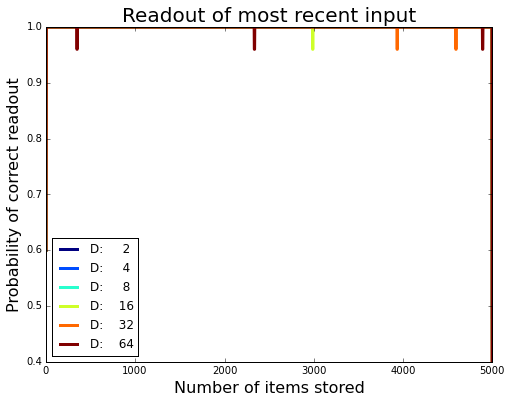

In [43]:
figure(figsize=(8,6))

cm=get_cmap('jet', li_mean.shape[1])

for i in range(li_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(li_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
legend(loc='lower left');
title('Readout of most recent input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)


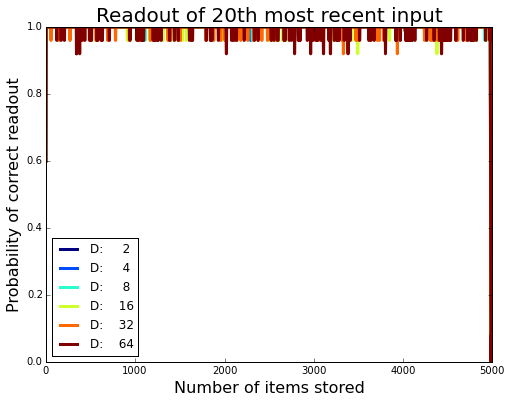

In [46]:
figure(figsize=(8,6))

cm=get_cmap('jet', iK_mean.shape[1])

for i in range(iK_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(iK_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
legend(loc='lower left');
title('Readout of %dth most recent input' % K, fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)


(0, 1000)

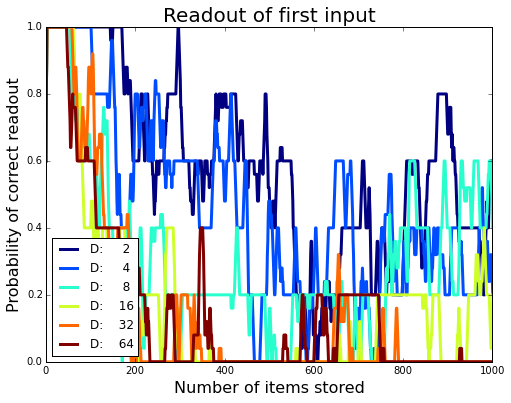

In [47]:
figure(figsize=(8,6))

cm=get_cmap('jet', li_mean.shape[1])

for i in range(fi_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(fi_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
legend(loc='lower left');
title('Readout of first input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)
xlim([0, 1000])